# Homework 3 - ASTRO 530 - Olivier Gilbert

## 1.

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.optimize import curve_fit
plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['text.usetex'] = False
plt.rc("axes", labelsize=16) 

def mass_growth(M_0, t, beta):
    """M(t) = M_0/(1-\beta M_0 t) where \beta M_0 t<<1"""
    return M_0/(1-beta*M_0*t)

### a)

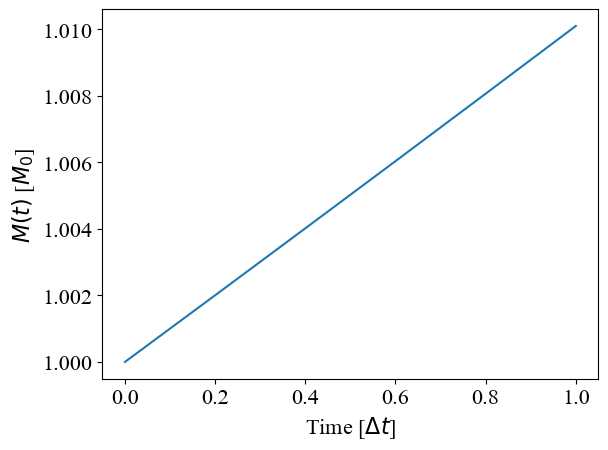

In [166]:
M_0 = 1 # in units of M_0
t = np.linspace(0,1,1000) # in units of Delta t
beta_ = 0.01 # in units of (M_0*Delta t)^-1
plt.plot(t,mass_growth(M_0,t,beta_))
plt.xlabel(r"Time [$\Delta t$]")
plt.ylabel(r"$M(t)$ [$M_0$]")
plt.show()

### b)

$$\beta = \frac{2\pi G^2 \rho_0}{\left(c_{s,0}^2 + v_0^2\right)^{3/2}}$$

Assuming the characteristic flow velocity $v_0$ is zero and characteristic values for molecular clouds ($\mathrm{H}_2$, $n=10^2\mathrm{cm^{-3}}$, $T=10\mathrm{K}$), we can calculate $\beta$ in [$M_\odot^{-1}\mathrm{Myr^{-1}}$] :

$$\rho_0 = n\cdot m_{\mathrm{H}_2} \quad \quad m_{\mathrm{H}_2} = 3.34\times10^{-24}\mathrm{g}$$
$$\rho_0 = 10^2\mathrm{cm^{-3}} \cdot 3.34\times10^{-24}\mathrm{g} = 3.34\times10^{-22}\mathrm{g/cm^3}$$

In [103]:
rho0 = 3.34E-22 # g cm^-3
T = 10 # K
k = 1.3807E-16 # erg K^-1
G = 6.674E-8 # cm^3 g^-1 s^-2
m_H = 1.67E-24 # g
mu = 2 # because we have H_2


c_s0 = np.sqrt(k*T/(mu*m_H)) # cm s^-1
beta = 2*np.pi*G**2*rho0/(c_s0**2)**(3/2) # g^-1 s^-1
beta = beta*1.989E33*3.1536E13 # M_odot^-1 Myr^-1
print("c_s0",c_s0)
print("beta",beta)

c_s0 20331.828091269464
beta 0.06976070209130501


$$\beta = 6.976\times 10^{-2} \, [M_\odot^{-1}\mathrm{Myr^{-1}}]$$

### c)

In [15]:
def plot_dists(recording_of_masses, times):
    def plot_dist(dist, ax:plt.Axes, t, fit_pl=False, **kwargs):
        counts, bin_edges = np.histogram((dist), bins=50, density=False)
        mass_bins = np.array([(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)])
        ax.stairs(counts, bin_edges, fill=True, alpha=0.5, label=f"T={t:.2f} Myr", **kwargs)

        ax.set_xlabel(r"$M$ [$M_\odot$]", fontsize=15)
        ax.set_ylabel(r"d$N$/d$M$", fontsize=15)
        ax.legend(fontsize=15)
    plt.figure(figsize=(18,3))
    ax1 = plt.subplot(131)
    ax2 = plt.subplot(132)
    ax3 = plt.subplot(133)
    plot_dist(np.array(recording_of_masses)[:,0],ax1,times[0], color="blue", fit_pl=True)
    plot_dist(np.array(recording_of_masses)[:,int(len(times)/2)],ax2,times[int(len(times)/2)], color="orange", fit_pl=True)
    plot_dist(np.array(recording_of_masses)[:,-1],ax3,times[-1], color="red", fit_pl=True)
    plt.show()

0.33333333333333337


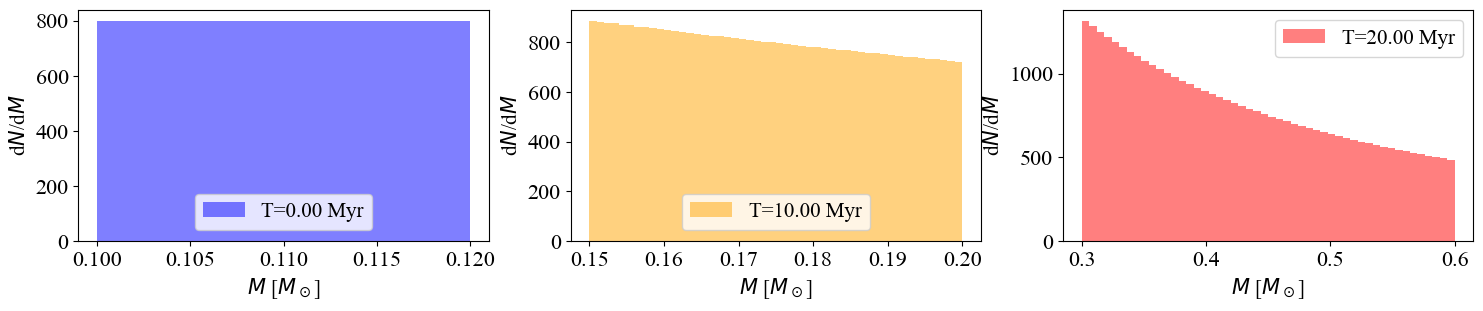

In [25]:
# Evolve the masses
set_of_masses = np.linspace(0.1,0.12,40000) # in M_odot
times = np.linspace(0,20,10000) # in Myr
recording_of_masses = []
beta = 0.8/(times[-1]*np.max(set_of_masses))
print(beta)
for m0 in set_of_masses:
    recording_of_masses.append(mass_growth(m0, times, beta))
# Plot the initial, intermediate, and final mass distribution
plot_dists(recording_of_masses,times)

We use $\beta=3.33$ instead of the beta found in b) since it is not steep enough for us to see the evolution in only 2Myr otherwise. Thsi value is chosen because we know $\beta M_0 t < 1$, so isolating $\beta$ gives us $$\beta < \frac{1}{M_0 t}$$
To choose a value, we use the highest initial mass (0.12$M_\odot$) and the latest time (2\mathrm{Myr}), and multiply the result by 0.8 to make sure it doesn't violate the constraint, which gives us $\beta=3.33$.

We see that the initially uniform distribution ends its evolution after 2Myr with all masses having accreted, but lower masses being more common than higher masses.

### d)

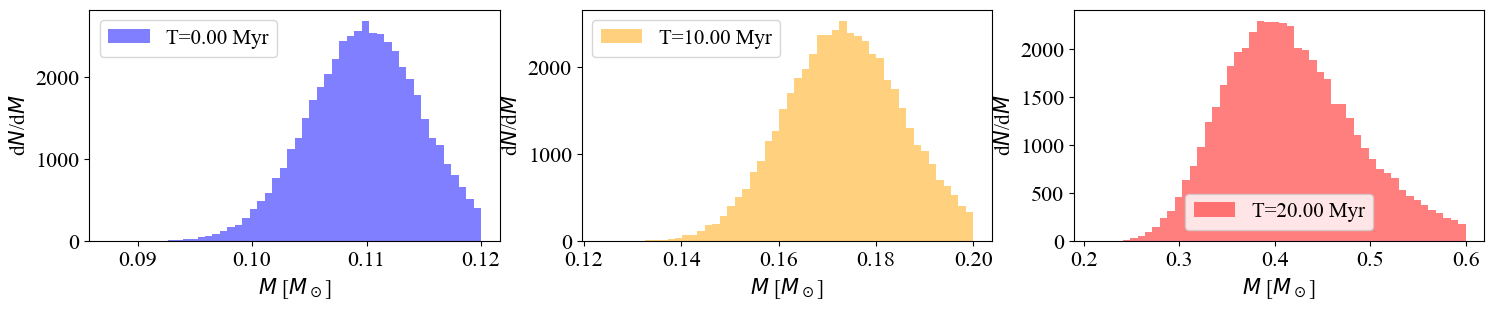

In [24]:
# Evolve the masses with non-uniform prior masses
from scipy.stats import norm
set_of_masses = np.random.normal(loc=0.11, scale=0.005, size=50000) # in M_odot
set_of_masses = set_of_masses[(set_of_masses < 0.12)] # Make sure our beta constraint isn't violated by masses higher than 0.12, which we used to calculate our limit.
recording_of_masses = []
for m0 in set_of_masses:
    recording_of_masses.append(mass_growth(m0, times, beta))
plot_dists(recording_of_masses,times)

We see the initially normal distribution of masses ends its evolution at 2Myr with a skewness, being steeper at low masses than high masses. The most common mass was displaced to the left of the median, which is exactly what we observed for c).

## 2.

### a)

We have the following diffusion equation to describe the temperature in the inner regions of the cloud:
$$\frac{\mathrm{d}T}{\mathrm{d}r} = - \frac{3\kappa_R \rho L}{64 \pi \sigma T^3 r^2}$$
with $\kappa_R$ being the Rosseland mean opacity, defined as 
$$\kappa_R = \kappa_0 \left(\frac{T}{T_0} \right)^\beta$$
and $\rho$ described by
$$\rho = \rho_0 \left(\frac{r}{r_0} \right)^{-3/2}$$


We want to show that the temperature should depend upon radius as $T\propto r^\frac{-5}{{2(4-\beta)}}$ for large optical depth ($T\to 0$ and $r\to \infty$).

We can start by substituting $\rho$ and $\kappa_R$ back into the diffusion equation and integrating it:

\begin{align*}
\frac{\mathrm{d}T}{\mathrm{d}r} &= - \frac{3\kappa_R \rho L}{64 \pi \sigma T^3 r^2} \\
\frac{\mathrm{d}T}{\mathrm{d}r} &= - \frac{3\kappa_0 \rho_0 L}{64 \pi \sigma T^3 r^2}\left(\frac{T}{T_0} \right)^\beta\left(\frac{r}{r_0} \right)^{-3/2} \\
\frac{\mathrm{d}T}{\mathrm{d}r} &= - \frac{3\kappa_0 \rho_0 L}{64 \pi \sigma T_0^{\beta} r_0^{-3/2}}T^{-(3-\beta)}r^{-7/2} \\
T^{(3-\beta)}\mathrm{d}T &= - \frac{3\kappa_0 \rho_0 L}{64 \pi \sigma T_0^{\beta} r_0^{-3/2}}r^{-7/2} \mathrm{d}r\\
\int T^{(3-\beta)}\mathrm{d}T &= - \frac{3\kappa_0 \rho_0 L}{64 \pi \sigma T_0^{\beta} r_0^{-3/2}}\int r^{-7/2} \mathrm{d}r\\
\frac{T^{(4-\beta)}}{4-\beta} &= - \frac{3\kappa_0 \rho_0 L}{64 \pi \sigma T_0^{\beta} r_0^{-3/2}} \frac{r^{-5/2}}{-5/2}+C\\
\end{align*}
Where $C$ is a constant.
\begin{align*}
T^{(4-\beta)} &= \frac{3\kappa_0 \rho_0 L (4-\beta)}{160 \pi \sigma T_0^{\beta} r_0^{-3/2}} r^{-5/2}+C\\
T &= \left[\frac{3\kappa_0 \rho_0 L (4-\beta)}{160 \pi \sigma T_0^{\beta} r_0^{-3/2}}\right]^{(4-\beta)} r^{\frac{-5}{2(4-\beta)}}+C\\
\end{align*}
We can use the boundary condition $T(r\to \infty) \to 0$ to find $C$:
$$0 = \lim_{r\to \infty}\left[\frac{3\kappa_0 \rho_0 L (4-\beta)}{160 \pi \sigma T_0^{\beta} r_0^{-3/2}}\right]^{(4-\beta)} r^{\frac{-5}{2(4-\beta)}}+C$$
We can see that $r$ has a negative exponent. Therefore, $r\to \infty$ will lead to $1/\infty$, which is 0. We are left with $C=0$, which enables us to get rid of the constant.
\begin{align*}
T &= \left[\frac{3\kappa_0 \rho_0 L (4-\beta)}{160 \pi \sigma T_0^{\beta} r_0^{-3/2}}\right]^{(4-\beta)} r^{\frac{-5}{2(4-\beta)}}\\
T &\propto  r^{\frac{-5}{2(4-\beta)}}\\
& \square
\end{align*}


### b)

$$B_\nu = \frac{8\pi h\nu^3}{c^3} \frac{1}{e^\frac{h\nu}{kT}-1}$$

$$\kappa_P = \frac{\int_0^\infty \kappa_\nu B_\nu \mathrm{d}\nu}{B}$$
$$\kappa_P \propto \frac{\int_0^\infty \lambda^{-\gamma} B_\nu \mathrm{d}\nu}{B}$$
$$\kappa_P \propto \frac{1}{B}\int_0^\infty \frac{\nu^{\gamma+3}}{e^\frac{h\nu}{kT}-1} \mathrm{d}\nu$$
We can easily recognize this to be a Bose integral (see https://www.robertobigoni.it/English/Matematica/Integrali/IntegraliBose/BoseIntegrals.html), and we can directly find the result:

$$\kappa_P \propto \frac{1}{B} \Gamma(\gamma+4)\zeta(\gamma+4)\left(\frac{kT}{h}\right)^{\gamma+4}$$

where $\Gamma(x)$ is the Gamma function and $\zeta(x)$ the Riemann-Zeta function, which can both be treated as constants. Substituting $B$ for its expression $\sigma T^4$, we can show the correct proof:

$$\kappa_P \propto \frac{1}{\sigma T^4} \left(\frac{kT}{h}\right)^{\gamma+4}$$
$$\kappa_P \propto  \left(\frac{k}{h}\right)^{\gamma+4} \frac{T^{\gamma+4}}{\sigma T^4}$$
$$\kappa_P \propto  T^{\gamma}$$

We now want to show that for $J \propto r^{-2}$, $T\propto r^{-2/(4+\gamma)}$:

\begin{align*}
    \int_0^\infty \kappa_\nu(J_\nu-B_\nu)\mathrm{d}\nu &= 0 \\
    \int_0^\infty \kappa_\nu J_\nu\mathrm{d}\nu - \int_0^\infty \kappa_\nu B_\nu\mathrm{d}\nu &= 0 \\
    \int_0^\infty \kappa_\nu J_\nu\mathrm{d}\nu &= \int_0^\infty \kappa_\nu B_\nu\mathrm{d}\nu \\
\end{align*}

We know that $J\propto r^{-2}$, so the term on the left will also be $\propto r^{-2}$ as there is no dependency on $r$ in $\kappa_\nu$. Also, we have already found the term on the right to be proportionnal to $T^{\gamma+4}$. We can therefore drop the equality sign for a proportionnal to sign and replace the terms by these values:


\begin{align*}
   r^{-2} &\propto T^{\gamma+4} \\
   r^{-2/(\gamma+4)} &\propto T \\
   \square
\end{align*}

At long wavelengths, where $\gamma \propto 2$, we would then have $T\propto r^{-1/3}$.

### c)

We can start from the equation of diffusion again:

$$\frac{\mathrm{d}T}{\mathrm{d}r} = - \frac{3\kappa_R \rho L}{64 \pi \sigma T^3 r^2}$$

With $\kappa_R$ being a function of the temperature:

$$\kappa_R(T) = \frac{20 T}{1000 [\mathrm{K}]} [\mathrm{cm^2 g^{-1}}]$$

We are also assuming steady spherical infall:

$$\dot{M} = 2.5\times 10^{-6} \ [M_\odot /[\mathrm{yr}]]$$

This lets us calculate the density $\rho$ knowing infall is approximately free-fall (no pressure support), and that the velocity of the material in free-fall is $\sqrt{2GM/r}$:

\begin{align*}
    \dot{M} &= 4\pi r^2 \rho v \\
    \dot{M} &= 4\pi r^2 \rho \sqrt{\frac{2GM}{r}} \\
    \rho &= \frac{\dot{M}}{4\pi \sqrt{2GM} r^{3/2}} \\
\end{align*}

Where the central mass $M$ is: $$M = M_0 + \dot{M}t = \left(0.3+\frac{2.5\times 10^{-6}}{[\mathrm{yr}]}t\right) \ [M_\odot]$$

We can now solve the diffusion equation:

\begin{align*}
    \frac{\mathrm{d}T}{\mathrm{d}r} &= - \frac{3\kappa_R \rho L}{64 \pi \sigma T^3 r^2} \\
    \frac{\mathrm{d}T}{\mathrm{d}r} &= - \frac{3\left(\frac{20 T}{1000 [\mathrm{K}]}\right) \left(\frac{\dot{M}}{4\pi \sqrt{2GM} r^{3/2}}\right) L_\odot}{64 \pi \sigma T^3 r^2} \\
    \frac{\mathrm{d}T}{\mathrm{d}r} &= - \frac{3 \dot{M} L_\odot }{12800 \sqrt{2GM} \pi^2 \sigma }T^{-2}r^{-7/2} \cdot [\mathrm{K^{-1}}]\\
    T^{2}\mathrm{d}T &= - \frac{3 \dot{M} L_\odot }{12800 \sqrt{2GM} \pi^2 \sigma }r^{-7/2} \mathrm{d}r \cdot [\mathrm{K^{-1}}]\\
    \int T^{2}\mathrm{d}T &= - \frac{3 \dot{M} L_\odot }{12800 \sqrt{2GM} \pi^2 \sigma } \int r^{-7/2} \mathrm{d}r \cdot [\mathrm{K^{-1}}]\\
    \frac{T^{3}}{3} &= \frac{3 \dot{M} L_\odot }{12800 \sqrt{2GM} \pi^2 \sigma } \frac{2r^{-5/2}}{5} \cdot [\mathrm{K^{-1}}]\\
    T^{3} &= \frac{9 \dot{M} L_\odot }{32000 \sqrt{2GM} \pi^2 \sigma } r^{-5/2} \cdot [\mathrm{K^{-1}}]\\
\end{align*}

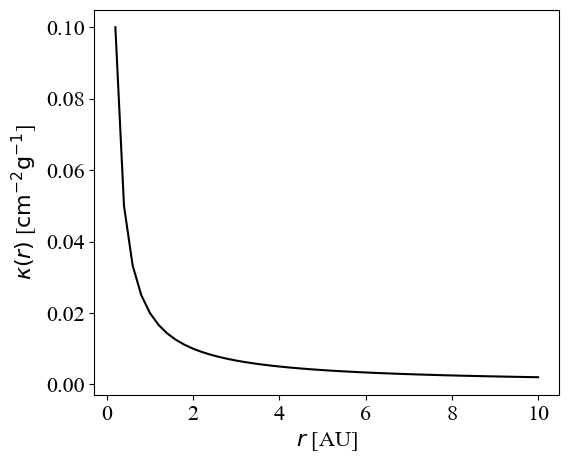

In [5]:
# Steady spherical infall
infall = 2.5E-6 # M_odot yr^-1
proto_mass = 0.3 # M_odot
lum = 1 # L_odot
kappa_r = lambda T: 20*T/1000 # cm^2 g^-1

radii = np.linspace(0.2,10) # AU
Temps = 1/radii

plt.figure(figsize=(6,5))
plt.plot(radii, kappa_r(Temps), color="black")
plt.xlabel(rf"$r$ [AU]")
plt.ylabel(r"$\kappa(r)$ [$\mathrm{cm^{-2} g^{-1}}$]")
plt.show()

## 3.

$$M=1M_\odot$$
$$\dot{M}=\frac{c_s^3}{G}$$
$$r_0 = 0.5\frac{GM}{c_s^2}$$

### a)

The expansion wave is at radius $r_e=\frac{c_s t}{2}$. We know that, for a rotating collapse, the material arrives at a centrifugal radius $r_c$ following:

$$r_c = \frac{r_i^4 \Omega_0^2 \sin^2\theta}{GM}$$

Where $r_i$ is the starting radius of the infalling material ($r_e$ in that case), $M$ the central mass, $\Omega_0$ the initial angular velocity, and $\theta$ the infalling angle. We know that the centrifugal radius will be the largest when $\theta=\pi/2$, so that's what we use to find the evolution of $r_c$ over time.

$$r_c = \frac{\left(\frac{c_s t}{2}\right)^4 \Omega_0^2}{GM}$$

We know the central mass will simply be the mass accreted over time: $M=\dot{M}t = \frac{c_s^3 t}{G}$.

$$r_c = \frac{\left(\frac{c_s t}{2}\right)^4 \Omega_0^2}{G\left(\frac{c_s^3 t}{G}\right)} = \frac{c_s t^3 \Omega_0^2}{16}$$
$$\square$$

### b)

We will assume the protostellar cloud is made entirely of molecular hydrogen ($m_H = 1.67\times 10^{-24} \mathrm{g}$, $\mu=2$). With the sound speed $c_s$, we can calculate the time at which the accreted mass $\dot{M}t=1M_\odot$:

$$c_s = \sqrt{\frac{kT}{\mu m_H}} = 20331.83 \ [\mathrm{cm/s}]$$

$$\dot{M}t_\mathrm{end} = 1 M_\odot = \frac{c_s^3 t}{G}$$
$$t_\mathrm{end} = \frac{1M_\odot \cdot G}{c_s^3 }$$
$$t_\mathrm{end} = 0.5 \ [\mathrm{Myr}]$$

20331.828091269464
0.5004914343345468


C:\Users\olivi\AppData\Local\Temp\ipykernel_18724\1979876011.py:19: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(times), np.log10(r_c(times,0.1*Omega_b)), color="black", ls="--", lw=2, marker="None", label=r"$\Omega_0 = 0.1 \Omega_b$")
C:\Users\olivi\AppData\Local\Temp\ipykernel_18724\1979876011.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(times), np.log10(r_c(times,0.01*Omega_b)), color="blue", ls="--", lw=2, marker="None", label=r"$\Omega_0 = 0.01 \Omega_b$")


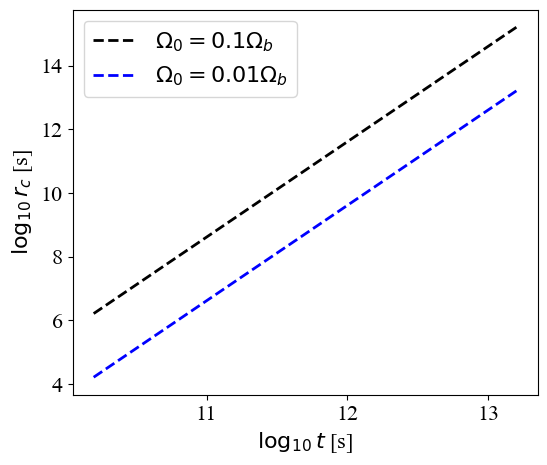

In [33]:
T = 10 # K
k = 1.3807E-16 # erg K^-1
G = 6.674E-8 # cm^3 g^-1 s^-2
m_H = 1.67E-24 # g
mu = 2 # because we have H_2
M_sun = 1.989E33 # g
M_ini = M_sun
c_s = np.sqrt(k*T/(mu*m_H)) # cm s^-1
t_accreted = M_sun*G/c_s**3 # s
t_accreted_Myr = t_accreted/(3600*24*365.2425)*1E-6 #M yr
print(c_s)
print(t_accreted_Myr)
r_c = lambda t, Omega0: c_s*t**3*Omega0**2/16
r0 = 0.5*(G*M_ini/c_s**2)
Omega_b = np.sqrt(G*M_ini/r0**3)

times = np.linspace(0, t_accreted, 1000)
plt.figure(figsize=(6,5))
plt.plot(np.log10(times), np.log10(r_c(times,0.1*Omega_b)), color="black", ls="--", lw=2, marker="None", label=r"$\Omega_0 = 0.1 \Omega_b$")
plt.plot(np.log10(times), np.log10(r_c(times,0.01*Omega_b)), color="blue", ls="--", lw=2, marker="None", label=r"$\Omega_0 = 0.01 \Omega_b$")
plt.xlabel(r"$\log_{10}t$ [s]")
plt.ylabel(r"$\log_{10}r_c$ [s]")
plt.legend(fontsize=16)
plt.show()

This plot shows that the higher the angular momentum, the more the cloud will create an accretion disk that is further from the proto-star core, as it needs to conserve its angular momentum. If the cloud spins slower initially, the gas will have an easier time falling towards the center, and thus the centrifugal radius will be smaller.